<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/creditcard_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine learning (2) - Final Project

###Team members:


*  Shihab Battah
*  Naseem Ananzeh
*  Rama Jaradat

*  Fatin Jaddo

IMPORTANT FOR TEAM
---
Kaggle Summary – Credit Card Fraud Detection Dataset

* Instances: 284,807 transactions

* Features: 30 total (28 PCA features + Time, Amount)

* Target: Class (1 = Fraud, 0 = Not Fraud)

* Data Type: All numerical

* Fraud Rate: 0.172% (492 frauds)







--------------------------------------------------------

    








>

#   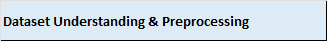

##**loading the data**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "creditcard.csv"

data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path)

<ipython-input-59-f18de703d9a9>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  data = kagglehub.load_dataset(


In [60]:
data.shape

(284807, 31)

In [61]:
#Dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [62]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [63]:
# Finding out which features(Columns) have missing values
data.isnull().sum()

# Nice! The dataset has no null values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [64]:
# We dropped the Time column because it’s not useful for detecting fraud
data=data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
from sklearn.preprocessing import StandardScaler

# Scale the Amount feature
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [66]:
data.duplicated().sum()

np.int64(9144)

In [67]:
data=data.drop_duplicates()
data.shape

(275663, 30)

In [68]:
data['Class'].value_counts()

,count
Class,
0,275190
1,473


In [69]:
#split the data because we don't need the class column
X = data.drop(['Class'], axis=1)
y = data['Class']

<Axes: ylabel='count'>

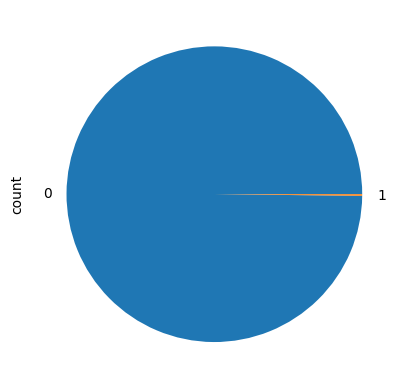

In [70]:
data['Class'].value_counts().plot.pie()

In [71]:
from imblearn.under_sampling import RandomUnderSampler
RS = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = RS.fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.DataFrame(y_resampled, columns=['Class'])
y_resampled.value_counts()

,count
Class,
0,473
1,473


<Axes: ylabel='count'>

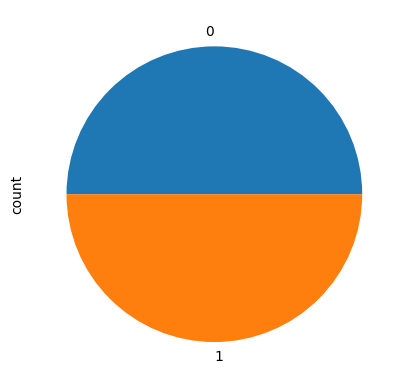

In [72]:
y_resampled['Class'].value_counts().plot.pie()

**Note**:Unlike ***random oversampling***, **SMOTE** does not simply duplicate the minority class samples. Instead, it generates new synthetic samples by interpolating between existing minority class instances and their nearest neighbors.

#Techniques and Algorithms You Must Apply


##**Dimensionality Reduction**

###PCA

In [73]:
corr=X_resampled.corr()
corr.round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.00,-0.80,0.87,-0.59,0.86,0.35,0.87,-0.23,0.64,0.71,...,-0.33,0.11,-0.09,0.02,-0.09,-0.12,0.03,0.11,0.19,-0.04
V2,-0.80,1.00,-0.87,0.69,-0.80,-0.36,-0.84,0.15,-0.71,-0.77,...,0.43,-0.11,0.09,0.07,0.02,0.13,0.01,-0.08,0.03,-0.20
V3,0.87,-0.87,1.00,-0.76,0.84,0.50,0.89,-0.29,0.75,0.83,...,-0.39,0.07,-0.08,0.01,0.02,-0.11,-0.03,-0.00,0.10,-0.02
V4,-0.59,0.69,-0.76,1.00,-0.57,-0.46,-0.72,0.14,-0.79,-0.81,...,0.33,-0.05,0.15,0.01,-0.07,-0.02,0.13,0.05,-0.04,0.01
V5,0.86,-0.80,0.84,-0.57,1.00,0.33,0.84,-0.33,0.64,0.73,...,-0.34,0.08,-0.10,-0.05,-0.12,-0.11,0.03,0.10,0.14,-0.12
V6,0.35,-0.36,0.50,-0.46,0.33,1.00,0.34,-0.53,0.38,0.44,...,-0.11,-0.20,0.16,0.27,-0.01,-0.13,-0.08,-0.24,-0.14,0.13
V7,0.87,-0.84,0.89,-0.72,0.84,0.34,1.00,-0.05,0.77,0.87,...,-0.46,0.21,-0.23,-0.02,-0.05,0.04,-0.00,0.15,0.14,0.10
V8,-0.23,0.15,-0.29,0.14,-0.33,-0.53,-0.05,1.00,-0.10,-0.10,...,-0.16,0.38,-0.36,-0.32,0.04,0.30,0.01,0.40,0.10,0.02
V9,0.64,-0.71,0.75,-0.79,0.64,0.38,0.77,-0.10,1.00,0.85,...,-0.40,0.17,-0.25,-0.05,0.03,-0.02,-0.12,0.05,0.09,0.01
V10,0.71,-0.77,0.83,-0.81,0.73,0.44,0.87,-0.10,0.85,1.00,...,-0.40,0.12,-0.26,-0.04,0.00,0.03,-0.06,0.05,0.09,-0.01


**Note**:There is a good Correlation between the Feature , for that we need  ***PCA*** for reduce the dimensionality and data become ***uncorlleted***

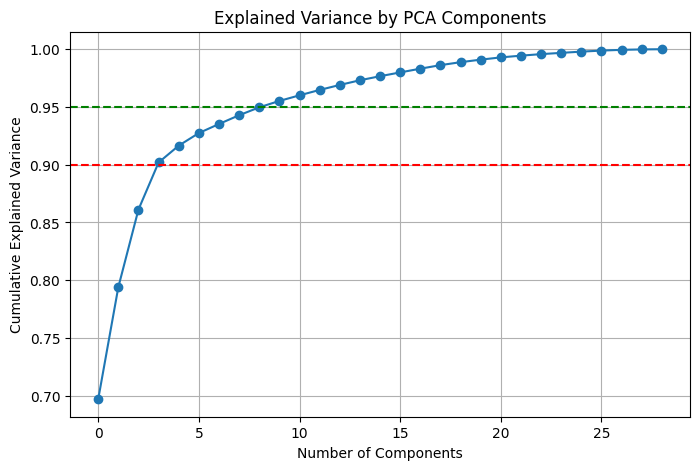

In [74]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_resampled)
# cv = cumulative_variance
cv = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(cv, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

In [161]:
# Initialize PCA with the desired number of components ( 6)
pca = PCA(n_components=5)

# Fit PCA on the resampled data and apply dimensionality reduction
X_pca = pca.fit_transform(X_resampled)

# X_pca now contains the transformed data with reduced dimensions
print("Shape after PCA:", X_pca.shape)

Shape after PCA: (946, 5)


In [162]:
# Optional: Print the explained variance ratio for each selected component
print("Explained variance ratio per component:")
print(pca.explained_variance_ratio_)

Explained variance ratio per component:
[0.69695439 0.09708476 0.0671573  0.04074476 0.01457825]


Test:

**Note**:# PCA analysis shows that 5 components explain ~92.3% of the total variance.
This confirms that dimensionality reduction using PCA is effective and efficient for this dataset.

In [111]:
#from sklearn.model_selection import train_test_split


# الآن قسم البيانات

#X_train, X_test, y_train, y_test = train_test_split(X_pc, y_resampled, test_size=0.2, random_state=42)

In [112]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score
# استخدام Logistic Regression
#model = LogisticRegression(solver='liblinear', max_iter=1000)

# تدريب النموذج على البيانات بعد PCA
#model.fit(X_train, y_train)

# التنبؤ
#y_pred = model.predict(X_test)

# التقييم
#print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9315789473684211


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### t-SNE

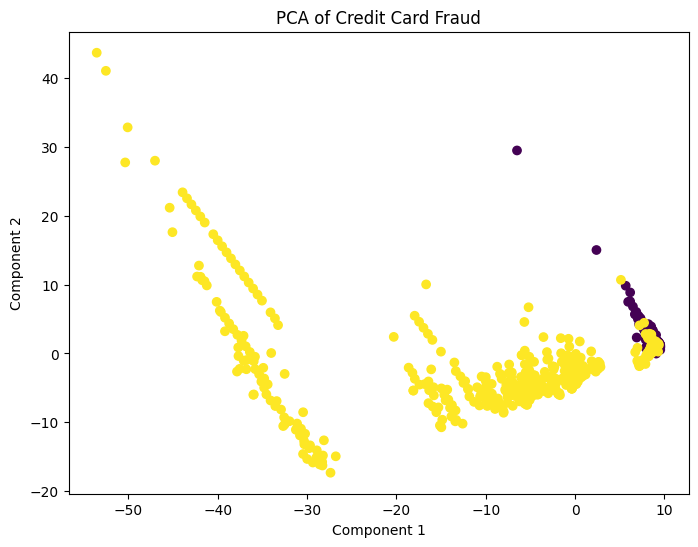

In [164]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled['Class'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.title('PCA of Credit Card Fraud')
plt.show()

In [165]:
from sklearn.manifold import TSNE
tsne = TSNE(  random_state=42)
X_Sample=X_pca
X_tsne_before=tsne.fit_transform(X_Sample)

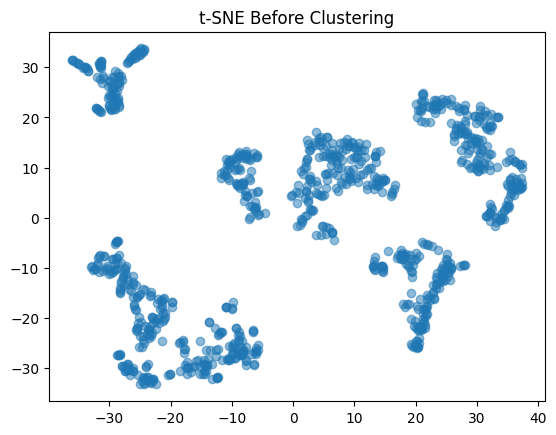

In [168]:
plt.scatter(x=X_tsne_before[:, 0], y=X_tsne_before[:, 1],alpha=0.5)
plt.title("t-SNE Before Clustering")


plt.show()

###K-means

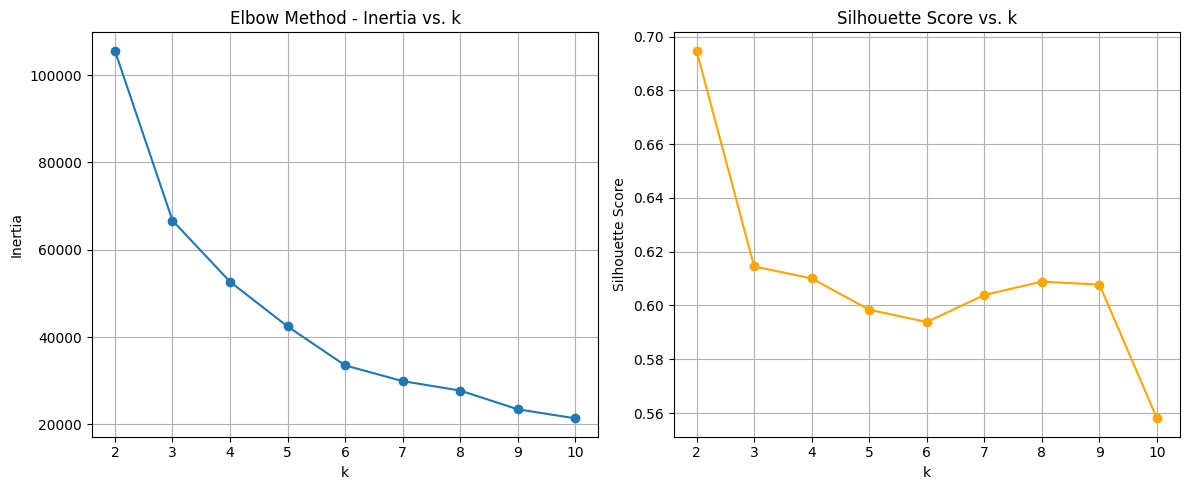

In [169]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

K_range = range(2, 11)

inertias = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_Sample)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_Sample, labels))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method - Inertia vs. k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid()

# رسم Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs. k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()


In [170]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [171]:
X_tsne_after = tsne.fit_transform(X_Sample)

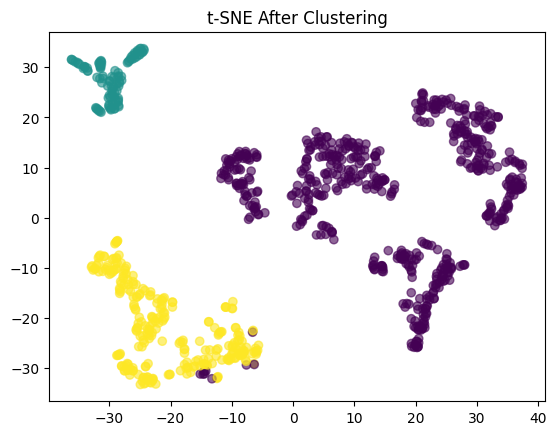

In [172]:
plt.scatter(X_tsne_after[:, 0], X_tsne_after[:, 1], c=clusters,alpha=0.6)
plt.title("t-SNE After Clustering")

plt.show()

In [173]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

kmeans.fit(X_pca)

labels = kmeans.predict(X_pca)

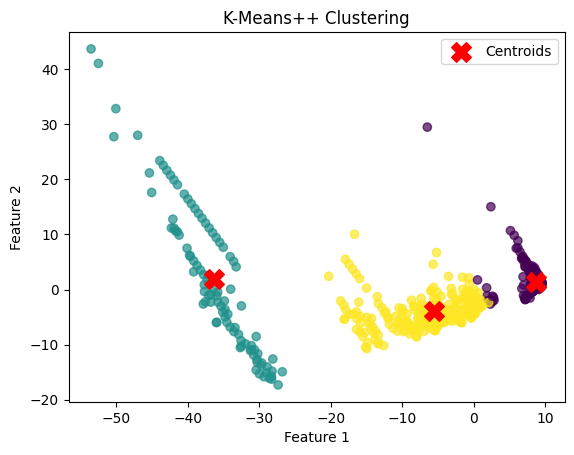

In [174]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels,  alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means++ Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [175]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
minibatch_kmeans.fit(X_pca)
labels2 = minibatch_kmeans.predict(X_pca)
